# Creando un corpus de palabras con los guiones

In [1]:
import json

def concat_strings(json_file):
    with open(json_file, "r") as f:
        json_data = json.load(f)
    
    with open("scripts_concat.txt", "w") as f:
        for movie in json_data.keys():
            movie_script = json_data[movie]['script']

            f.write(movie_script)

concat_strings('movies_scripts.json')


# Analizando el corpus de texto 

total number of words: 546974
average number of words per file: 23781.478260869564


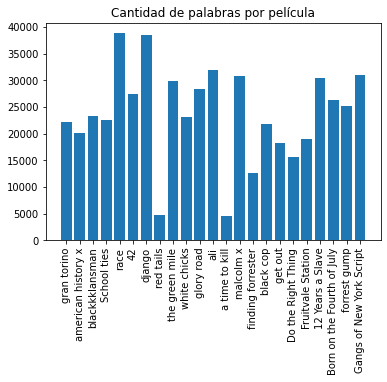

standard deviation of amount of words per script: 8878.390578301316


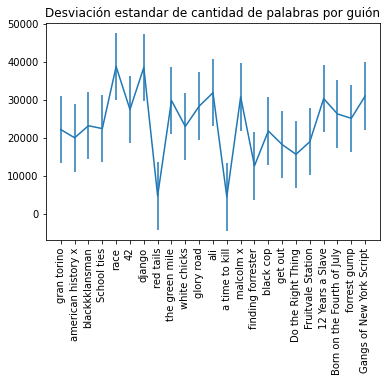

In [2]:
# number of words
import json
from math import sqrt
import matplotlib.pyplot as plt

def total_number_of_words(scripts_file):
    with open(scripts_file, "r") as f:
        scripts = f.read()
    
    return len(scripts.split())

print("total number of words: {}".format(total_number_of_words("scripts_concat.txt")))

def average_number_of_words_per_scripts(movie_scripts_json, scripts_file):
    with open(movie_scripts_json, "r") as f:
        movies_dict = json.load(f)
    
    total_num_words = total_number_of_words(scripts_file)
    mean = total_num_words / len(movies_dict.keys())
    return mean

print("average number of words per file: {}".format(average_number_of_words_per_scripts("movies_scripts.json", "scripts_concat.txt")))

def plot_number_of_words_per_script(movie_scripts_json):
    with open(movie_scripts_json, "r") as f:
        movies_dict = json.load(f)
    
    movies_name = list(movies_dict.keys())
    movies_scripts = map(lambda d: d["script"], movies_dict.values())
    words_counts = list(map(lambda s: len(s.split()), movies_scripts))

    plt.bar(x=movies_name, height=words_counts)
    plt.xticks(rotation = 90)
    plt.title("Cantidad de palabras por película")
    plt.show()

def standard_deviation_scripts(movie_scripts_json, scripts_file):
    mean = average_number_of_words_per_scripts(movie_scripts_json, scripts_file)

    with open(movie_scripts_json, "r") as f:
        movies_dict = json.load(f)
    
    movies_name = list(movies_dict.keys())
    movies_scripts = map(lambda d: d["script"], movies_dict.values())
    
    words_counts = list(map(lambda s: len(s.split()), movies_scripts))

    movies_words_variance = list(map(lambda x: (x - mean) ** 2, words_counts))

    std_deviation = sqrt(sum(movies_words_variance) / (len(movies_name) - 1) )

    print("standard deviation of amount of words per script: {}".format(std_deviation))

    plt.errorbar(x=movies_name, y=words_counts, yerr=std_deviation)
    plt.xticks(rotation = 90)
    plt.title("Desviación estandar de cantidad de palabras por guión")
    plt.show()

plot_number_of_words_per_script("movies_scripts.json")

standard_deviation_scripts("movies_scripts.json", "scripts_concat.txt")



In [3]:
from collections import Counter

def words_counter(scripts_concat_file):
    with open(scripts_concat_file, "r") as f:
        words = f.read().split()
    
    #print(words)
    
    counts = Counter(words)
    return counts.most_common()

words_counter("scripts_concat.txt")

[('the', 21391),
 ('a', 11134),
 ('to', 10801),
 ('and', 9948),
 ('of', 7393),
 ('I', 6486),
 ('in', 6009),
 ('you', 5523),
 ('his', 5070),
 ('is', 4822),
 ('-', 4324),
 ('on', 3780),
 ('The', 3504),
 ('with', 3263),
 ('at', 3045),
 ('He', 2820),
 ('for', 2553),
 ('it', 2522),
 ('he', 2522),
 ('as', 2394),
 ('that', 2390),
 ('You', 2004),
 ('are', 1907),
 ('up', 1890),
 ('from', 1879),
 ('out', 1823),
 ('her', 1797),
 ('INT.', 1650),
 ('be', 1616),
 ('have', 1490),
 ('your', 1486),
 ('him', 1458),
 ("I'm", 1453),
 ('was', 1376),
 ('looks', 1367),
 ('A', 1364),
 ('like', 1360),
 ('my', 1354),
 ('this', 1352),
 ('not', 1345),
 ('we', 1265),
 ("don't", 1235),
 ('me', 1214),
 ('all', 1202),
 ('into', 1195),
 ('but', 1186),
 ('just', 1158),
 ('back', 1105),
 ('by', 1086),
 ('do', 1085),
 ('they', 1078),
 ('what', 1066),
 ('get', 1053),
 ('DAY', 1043),
 ('down', 1019),
 ('about', 1004),
 ('an', 1000),
 ('And', 998),
 ('EXT.', 992),
 ('can', 989),
 ('She', 979),
 ('one', 975),
 ('over', 971),